In [1]:
!sudo apt update -y
!pip install nltk
!pip install gensim
!sudo apt-get install default-jre -y

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic InRelease [242 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]33m
Get:4 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:5 http://security.ubuntu.com/ubuntu bionic-security/restricted amd64 Packages [19.2 kB]
Get:6 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [761 kB]
Get:7 http://archive.ubuntu.com/ubuntu bionic/restricted amd64 Packages [13.5 kB]
Get:8 http://archive.ubuntu.com/ubuntu bionic/main amd64 Packages [1,344 kB]   
Get:9 http://security.ubuntu.com/ubuntu bionic-security/multiverse amd64 Packages [6,781 B]3m
Get:10 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages [795 kB]
Get:11 http://archive.ubuntu.com/ubuntu bionic/multiverse amd64 Packages [186 kB]0m
Get:12 http://archive.ubuntu.com/ubuntu bionic/universe amd64 Packages [11.3 MB]
Get:13 http://arch

Adding debian:OpenTrust_Root_CA_G2.pem
Adding debian:GeoTrust_Universal_CA_2.pem
Adding debian:Visa_eCommerce_Root.pem
Adding debian:ePKI_Root_Certification_Authority.pem
Adding debian:Starfield_Root_Certificate_Authority_-_G2.pem
Adding debian:TeliaSonera_Root_CA_v1.pem
Adding debian:USERTrust_RSA_Certification_Authority.pem
Adding debian:TrustCor_RootCert_CA-2.pem
Adding debian:GeoTrust_Universal_CA.pem
Adding debian:D-TRUST_Root_Class_3_CA_2_2009.pem
Adding debian:DigiCert_Assured_ID_Root_CA.pem
Adding debian:Hellenic_Academic_and_Research_Institutions_ECC_RootCA_2015.pem
Adding debian:D-TRUST_Root_Class_3_CA_2_EV_2009.pem
Adding debian:TrustCor_ECA-1.pem
Adding debian:TrustCor_RootCert_CA-1.pem
Adding debian:Entrust_Root_Certification_Authority_-_G2.pem
Adding debian:Security_Communication_RootCA2.pem
Adding debian:Hellenic_Academic_and_Research_Institutions_RootCA_2015.pem
Adding debian:TWCA_Root_Certification_Authority.pem
Adding debian:Go_Daddy_Root_Certificate_Authority_-_G2.pe

In [1]:
import pandas as pd
import numpy as np
import pickle
from os import path
import re
import nltk
import gensim
import time
import matplotlib.pyplot as plt
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [1]:
import pickle
from os import path
with open(path.expanduser('~/work/data/talk_meta.pkl'), "rb") as input_file:
    talk_meta = pickle.load(input_file)
    
with open(path.expanduser('~/work/data/talk_sub.pkl'), "rb") as input_file:
    talk_sub = pickle.load(input_file)

In [15]:
talk_sub[(talk_sub.talk_id == 1) & (talk_sub.id==1)]['transcript'].values

array(["Thank you so much, Chris. to come to this stage twice;\nI'm extremely grateful. I have been blown away by this conference, and I want to thank all of you\nfor the many nice comments about what I had to say the other night. And I say that sincerely, partly because (Mock sob) I need that."],
      dtype=object)

In [4]:
talk_sub.groupby('talk_id').count().sort_values('transcript')

,id,transcript
talk_id,,
1415.0,1,1
1619.0,1,1
1792.0,1,1
1793.0,1,1
1794.0,1,1
...,...,...
2010.0,216,216
254.0,221,221
2209.0,231,231


In [5]:
lem = nltk.stem.WordNetLemmatizer()
def prepare_text(text):
    text = re.sub(r'\((.*?)\)', ' ', text)
    text = re.sub(r'\d+', '', text)
    text = nltk.tokenize.RegexpTokenizer(r'\w+').tokenize(text.lower())
    text = [w for w in text if w not in nltk.corpus.stopwords.words('english')]
    text = [lem.lemmatize(w) for w in text]
    text = [w for w in text if len(w)>=3]
    return text

In [7]:
extra_keywords = []
talk_pre = talk_sub.copy()
talk_pre['transcript'] = talk_pre['transcript'].apply(lambda x: prepare_text(x))
talk_pre['transcript'] = talk_pre['transcript'].apply(lambda x: ' '.join(x))

In [8]:
data_words = talk_pre['transcript'].apply(lambda x: x.split()).values

id2word = gensim.corpora.Dictionary(data_words)
id2word.filter_n_most_frequent(20)


corpus = [id2word.doc2bow(text) for text in data_words]

In [9]:
id2word.token2id

{'away': 0,
 'blown': 1,
 'chris': 2,
 'come': 3,
 'comment': 4,
 'conference': 5,
 'extremely': 6,
 'grateful': 7,
 'many': 8,
 'much': 9,
 'need': 10,
 'nice': 11,
 'night': 12,
 'partly': 13,
 'say': 14,
 'sincerely': 15,
 'stage': 16,
 'thank': 17,
 'twice': 18,
 'position': 19,
 'put': 20,
 'air': 21,
 'eight': 22,
 'flew': 23,
 'force': 24,
 'two': 25,
 'airplane': 26,
 'boot': 27,
 'shoe': 28,
 'take': 29,
 'illustrate': 30,
 'quick': 31,
 'story': 32,
 'tell': 33,
 'bit': 34,
 'every': 35,
 'true': 36,
 'house': 37,
 'left': 38,
 'soon': 39,
 'tipper': 40,
 'white': 41,
 'driving': 42,
 'east': 43,
 'farm': 44,
 'home': 45,
 'little': 46,
 'mile': 47,
 'nashville': 48,
 'sound': 49,
 'back': 50,
 'hit': 51,
 'looked': 52,
 'mirror': 53,
 'motorcade': 54,
 'rear': 55,
 'sudden': 56,
 'view': 57,
 'heard': 58,
 'limb': 59,
 'pain': 60,
 'phantom': 61,
 'ford': 62,
 'rented': 63,
 'taurus': 64,
 'big': 65,
 'booth': 66,
 'came': 67,
 'chain': 68,
 'commotion': 69,
 'cost': 70,
 'd

In [10]:
def filter_text(text, tokens):
    filtered_text = []
    for word in text.split():
        if word in tokens:
            filtered_text.append(word)
    return filtered_text

In [11]:
talk_pre['transcript'] = talk_pre.transcript.apply(lambda x: filter_text(x, id2word.token2id))
talk_pre['transcript'] = talk_pre.transcript.apply(lambda x: ' '.join(x))

In [12]:
talk_pre['length'] = talk_pre['transcript'].apply(lambda x: len(x.split()))

In [13]:
talk_pre = talk_pre[talk_pre.length >= 5]

In [14]:
len(id2word)

49444

In [15]:
data_words = talk_pre['transcript'].apply(lambda x: x.split()).values

id2word = gensim.corpora.Dictionary(data_words)

corpus = [id2word.doc2bow(text) for text in data_words]

In [16]:
len(id2word)

49122

In [17]:
with open(path.expanduser('~/work/data/talk_pre.pkl'), 'wb') as output:
    pickle.dump(talk_pre, output, pickle.HIGHEST_PROTOCOL)

In [18]:
with open(path.expanduser('~/work/data/talk_pre.pkl'), "rb") as input_file:
    talk_pre = pickle.load(input_file)

In [19]:
talk_pre['length'].min()

5

In [20]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        start = time.time()
        mallet_path = path.expanduser('~/work/modules/mallet-2.0.8/bin/mallet')
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word, random_seed = 5, alpha = 0.1, iterations = 800, optimize_interval = 10)
        dur = time.time() - start
        print("Time Elapsed",dur,'s')
        model_list.append(model)
        coherencemodel = gensim.models.CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_per_topic = coherencemodel.get_coherence_per_topic()
        coherence_values.append((min(coherence_per_topic),np.mean(coherence_per_topic)))
        print('No. Topics ', num_topics,' - Mean Coherence ',np.mean(coherence_per_topic),' - Min Coherence ',min(coherence_per_topic))

    return model_list, coherence_values

In [21]:
limit=66
start=5
step=5
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_words, start=start, limit=limit, step=step)

Time Elapsed 109.08038473129272 s
No. Topics  5  - Mean Coherence  0.45678589932822466  - Min Coherence  0.3818414899064245
Time Elapsed 133.3303542137146 s
No. Topics  10  - Mean Coherence  0.49149079011935254  - Min Coherence  0.40242422414715645
Time Elapsed 150.06712174415588 s
No. Topics  15  - Mean Coherence  0.5200666809904619  - Min Coherence  0.40917280671113965
Time Elapsed 152.27088117599487 s
No. Topics  20  - Mean Coherence  0.5222271483209874  - Min Coherence  0.3709827697437483
Time Elapsed 158.40461993217468 s
No. Topics  25  - Mean Coherence  0.5349924339857826  - Min Coherence  0.42738794499061095
Time Elapsed 173.73261857032776 s
No. Topics  30  - Mean Coherence  0.5161328839678657  - Min Coherence  0.3749419431018066
Time Elapsed 185.2719020843506 s
No. Topics  35  - Mean Coherence  0.5362783406217556  - Min Coherence  0.2899994791925109
Time Elapsed 176.05911684036255 s
No. Topics  40  - Mean Coherence  0.5319178976421575  - Min Coherence  0.37050387101085286
Time 

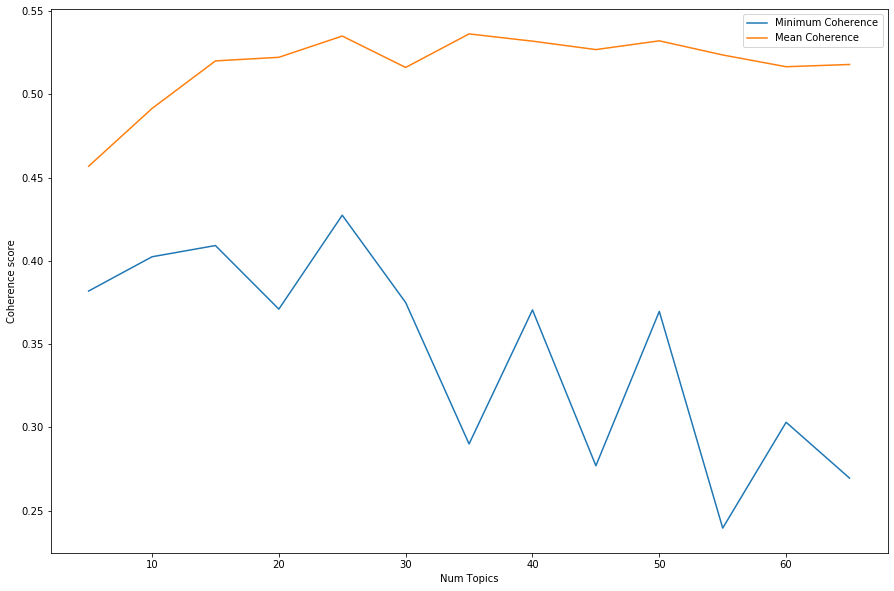

In [22]:
# Show graph
plt.figure(figsize=(15,10))
x = range(start, limit, step)
coherence_means, coherence_mins = zip(*coherence_values)
plt.plot(x, coherence_means)
plt.plot(x, coherence_mins)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(['Minimum Coherence', 'Mean Coherence'], loc='best')
plt.show()

In [23]:
num_topics = 25
start = time.time()
mallet_path = path.expanduser('~/work/modules/mallet-2.0.8/bin/mallet') # update this path
# prefix = path.expanduser('~/work/jupyter_notebooks/notebooks/mallet-dep/')
model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word, random_seed = 5, alpha = 0.1, iterations = 800, optimize_interval = 10)

dur = time.time() - start

print("Time Elapsed",dur,'s')

coherence_model_ldamallet = gensim.models.CoherenceModel(model=model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet, '\n\n')

coherence_ldamallet_per_topic = coherence_model_ldamallet.get_coherence_per_topic()
# Show Topics
for i in np.argsort(coherence_ldamallet_per_topic):
    print('Topic', i, '- Coherence', coherence_ldamallet_per_topic[i], '\n' ,model.print_topic(i, topn=10),'\n')

Time Elapsed 163.69370222091675 s

Coherence Score:  0.5349924339857826 


Topic 21 - Coherence 0.42738794499061095 
 0.019*"art" + 0.012*"film" + 0.012*"show" + 0.011*"image" + 0.011*"work" + 0.010*"artist" + 0.010*"kind" + 0.009*"movie" + 0.009*"made" + 0.009*"picture" 

Topic 5 - Coherence 0.43114296442641925 
 0.085*"brain" + 0.013*"neuron" + 0.010*"body" + 0.010*"memory" + 0.007*"sleep" + 0.007*"system" + 0.007*"cell" + 0.007*"human" + 0.007*"signal" + 0.007*"area" 

Topic 20 - Coherence 0.44130449832094953 
 0.018*"question" + 0.015*"good" + 0.011*"problem" + 0.011*"lot" + 0.010*"answer" + 0.010*"kind" + 0.009*"number" + 0.007*"study" + 0.007*"work" + 0.007*"find" 

Topic 2 - Coherence 0.447509440291355 
 0.019*"god" + 0.013*"book" + 0.011*"great" + 0.010*"religion" + 0.010*"story" + 0.009*"century" + 0.008*"man" + 0.008*"culture" + 0.008*"history" + 0.007*"called" 

Topic 8 - Coherence 0.45037682707226423 
 0.029*"life" + 0.012*"feel" + 0.011*"story" + 0.010*"love" + 0.009*"chan

In [27]:
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [28]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=model, corpus=corpus, texts=talk_pre['transcript'].values)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1.0,0.3156,"day, back, thought, started, night, room, guy,...",thank much chris come stage twice extremely gr...
1,1,11.0,0.4592,"earth, planet, space, life, mar, star, sun, mo...",flew air force two eight
2,2,6.0,0.4213,"life, change, feel, question, good, work, kind...",true story every bit true
3,3,1.0,0.5764,"day, back, thought, started, night, room, guy,...",soon tipper left white house
4,4,3.0,0.7452,"city, car, building, street, place, community,...",driving home nashville little farm mile east n...
5,5,1.0,0.4223,"day, back, thought, started, night, room, guy,...",looked rear view mirror sudden hit motorcade back
6,6,1.0,0.6363,"day, back, thought, started, night, room, guy,...",dinnertime started looking place eat got exit ...
7,7,1.0,0.5284,"day, back, thought, started, night, room, guy,...",took order went couple booth next lowered voic...
8,8,1.0,0.6467,"day, back, thought, started, night, room, guy,...",next day continuing totally true story got fly...
9,9,14.0,0.4740,"data, book, information, internet, medium, lot...",turned staff extremely upset wire service nige...


In [29]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.9661,"hand, put, body, robot, move, back, foot, show...",treadmill treadmill belt watch animal foot vid...
1,1.0,0.9537,"day, back, thought, started, night, room, guy,...",taking shower hotel room sydney moment died mi...
2,2.0,0.8767,"school, kid, student, teacher, child, educatio...",geoffrey canada john percent kid graduated hig...
3,3.0,0.9678,"city, car, building, street, place, community,...",another infill project parking lot office park...
4,4.0,0.9241,"woman, child, men, family, girl, mother, young...",yeah tumultuous fighting helping sober alcohol...
5,5.0,0.8757,"game, play, film, movie, guy, show, video, pla...",old looking movie watch hbo many remember ferr...
6,6.0,0.9415,"life, change, feel, question, good, work, kind...",topic gratefulness connection happiness gratef...
7,7.0,0.9391,"word, language, science, god, human, idea, que...",take three famous word western philosophy cogi...
8,8.0,0.9246,"music, sound, song, play, hear, voice, dance, ...",lungi dance lungi dance lungi dance lungi danc...
9,9.0,0.9049,"country, africa, india, china, state, african,...",fact million displaced home violence persecuti...


In [30]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0.0,1.0,"day, back, thought, started, night, room, guy,...",1807.0,0.0348
1.0,11.0,"earth, planet, space, life, mar, star, sun, mo...",5051.0,0.0973
2.0,6.0,"life, change, feel, question, good, work, kind...",1846.0,0.0356
3.0,1.0,"day, back, thought, started, night, room, guy,...",1386.0,0.0267
4.0,3.0,"city, car, building, street, place, community,...",2236.0,0.0431
...,...,...,...,...
51893.0,11.0,"earth, planet, space, life, mar, star, sun, mo...",NaN,NaN
51894.0,1.0,"day, back, thought, started, night, room, guy,...",NaN,NaN
51895.0,1.0,"day, back, thought, started, night, room, guy,...",NaN,NaN
51896.0,11.0,"earth, planet, space, life, mar, star, sun, mo...",NaN,NaN


In [31]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=model, corpus=corpus, texts=talk_pre['transcript'].values)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1.0,0.3156,"day, back, thought, started, night, room, guy,...",thank much chris come stage twice extremely gr...
1,1,11.0,0.4592,"earth, planet, space, life, mar, star, sun, mo...",flew air force two eight
2,2,6.0,0.4213,"life, change, feel, question, good, work, kind...",true story every bit true
3,3,1.0,0.5764,"day, back, thought, started, night, room, guy,...",soon tipper left white house
4,4,3.0,0.7452,"city, car, building, street, place, community,...",driving home nashville little farm mile east n...
5,5,1.0,0.4223,"day, back, thought, started, night, room, guy,...",looked rear view mirror sudden hit motorcade back
6,6,1.0,0.6363,"day, back, thought, started, night, room, guy,...",dinnertime started looking place eat got exit ...
7,7,1.0,0.5284,"day, back, thought, started, night, room, guy,...",took order went couple booth next lowered voic...
8,8,1.0,0.6467,"day, back, thought, started, night, room, guy,...",next day continuing totally true story got fly...
9,9,14.0,0.4740,"data, book, information, internet, medium, lot...",turned staff extremely upset wire service nige...


In [167]:
'''
Time Elapsed 163.69370222091675 s

Coherence Score:  0.5349924339857826 


Topic 21 - Coherence 0.42738794499061095 
 0.019*"art" + 0.012*"film" + 0.012*"show" + 0.011*"image" + 0.011*"work" + 0.010*"artist" + 0.010*"kind" + 0.009*"movie" + 0.009*"made" + 0.009*"picture" 

Topic 5 - Coherence 0.43114296442641925 
 0.085*"brain" + 0.013*"neuron" + 0.010*"body" + 0.010*"memory" + 0.007*"sleep" + 0.007*"system" + 0.007*"cell" + 0.007*"human" + 0.007*"signal" + 0.007*"area" 

Topic 20 - Coherence 0.44130449832094953 
 0.018*"question" + 0.015*"good" + 0.011*"problem" + 0.011*"lot" + 0.010*"answer" + 0.010*"kind" + 0.009*"number" + 0.007*"study" + 0.007*"work" + 0.007*"find" 

Topic 2 - Coherence 0.447509440291355 
 0.019*"god" + 0.013*"book" + 0.011*"great" + 0.010*"religion" + 0.010*"story" + 0.009*"century" + 0.008*"man" + 0.008*"culture" + 0.008*"history" + 0.007*"called" 

Topic 8 - Coherence 0.45037682707226423 
 0.029*"life" + 0.012*"feel" + 0.011*"story" + 0.010*"love" + 0.009*"change" + 0.008*"experience" + 0.008*"human" + 0.006*"live" + 0.006*"future" + 0.006*"talk" 

Topic 15 - Coherence 0.4515220031690628 
 0.026*"music" + 0.024*"sound" + 0.023*"word" + 0.022*"language" + 0.012*"hear" + 0.012*"song" + 0.011*"play" + 0.011*"voice" + 0.008*"english" + 0.008*"ted" 

Topic 14 - Coherence 0.45301164934125726 
 0.021*"game" + 0.016*"robot" + 0.013*"video" + 0.011*"play" + 0.009*"move" + 0.009*"computer" + 0.008*"show" + 0.007*"machine" + 0.007*"light" + 0.006*"camera" 

Topic 6 - Coherence 0.45577345309992606 
 0.022*"data" + 0.015*"information" + 0.013*"computer" + 0.012*"internet" + 0.012*"phone" + 0.008*"medium" + 0.008*"online" + 0.007*"book" + 0.007*"google" + 0.006*"technology" 

Topic 7 - Coherence 0.45656346269897796 
 0.014*"hand" + 0.012*"back" + 0.011*"put" + 0.008*"guy" + 0.008*"head" + 0.007*"eye" + 0.007*"good" + 0.005*"yeah" + 0.005*"face" + 0.005*"big" 

Topic 22 - Coherence 0.4747643128733972 
 0.018*"technology" + 0.015*"work" + 0.013*"idea" + 0.013*"problem" + 0.011*"system" + 0.010*"human" + 0.009*"design" + 0.008*"kind" + 0.008*"change" + 0.006*"create" 

Topic 11 - Coherence 0.5052255631864517 
 0.042*"cell" + 0.016*"body" + 0.011*"material" + 0.010*"structure" + 0.008*"molecule" + 0.008*"blood" + 0.008*"tissue" + 0.007*"skin" + 0.007*"inside" + 0.007*"put" 

Topic 4 - Coherence 0.5187873796550649 
 0.024*"day" + 0.013*"back" + 0.011*"thought" + 0.010*"started" + 0.009*"life" + 0.008*"home" + 0.008*"friend" + 0.008*"wanted" + 0.008*"story" + 0.007*"family" 

Topic 0 - Coherence 0.536639193531724 
 0.024*"war" + 0.008*"police" + 0.008*"country" + 0.008*"violence" + 0.007*"military" + 0.007*"refugee" + 0.006*"prison" + 0.006*"soldier" + 0.006*"weapon" + 0.006*"conflict" 

Topic 18 - Coherence 0.5387134976614774 
 0.016*"water" + 0.015*"earth" + 0.011*"ice" + 0.010*"ocean" + 0.010*"planet" + 0.009*"mar" + 0.008*"sea" + 0.008*"mile" + 0.007*"mountain" + 0.007*"foot" 

Topic 9 - Coherence 0.5416671640778915 
 0.025*"food" + 0.023*"water" + 0.020*"energy" + 0.011*"oil" + 0.010*"plant" + 0.009*"carbon" + 0.008*"fuel" + 0.008*"eat" + 0.007*"lot" + 0.007*"power" 

Topic 19 - Coherence 0.5696474644351069 
 0.019*"human" + 0.019*"gene" + 0.015*"dna" + 0.014*"specie" + 0.010*"virus" + 0.010*"genome" + 0.009*"animal" + 0.009*"genetic" + 0.008*"evolution" + 0.008*"ant" 

Topic 1 - Coherence 0.5745453288176896 
 0.047*"city" + 0.028*"car" + 0.024*"building" + 0.012*"place" + 0.011*"street" + 0.011*"space" + 0.008*"road" + 0.008*"york" + 0.008*"built" + 0.006*"community" 

Topic 10 - Coherence 0.5902639305658107 
 0.024*"money" + 0.023*"dollar" + 0.021*"company" + 0.015*"business" + 0.012*"cost" + 0.012*"market" + 0.009*"million" + 0.009*"job" + 0.008*"pay" + 0.008*"work" 

Topic 24 - Coherence 0.6108931773725613 
 0.076*"woman" + 0.029*"men" + 0.028*"child" + 0.020*"girl" + 0.015*"baby" + 0.014*"mother" + 0.013*"young" + 0.013*"family" + 0.012*"sex" + 0.010*"black" 

Topic 16 - Coherence 0.6111444838005902 
 0.032*"country" + 0.029*"percent" + 0.019*"africa" + 0.011*"state" + 0.011*"million" + 0.011*"china" + 0.010*"population" + 0.009*"india" + 0.009*"today" + 0.009*"number" 

Topic 12 - Coherence 0.6273791440365895 
 0.049*"school" + 0.032*"kid" + 0.028*"student" + 0.020*"child" + 0.018*"teacher" + 0.016*"education" + 0.011*"high" + 0.011*"learning" + 0.011*"class" + 0.010*"university" 

Topic 23 - Coherence 0.6432008044636636 
 0.021*"animal" + 0.016*"tree" + 0.015*"fish" + 0.014*"forest" + 0.012*"ocean" + 0.012*"specie" + 0.008*"bird" + 0.008*"coral" + 0.007*"water" + 0.007*"shark" 

Topic 17 - Coherence 0.6482671250098597 
 0.023*"patient" + 0.022*"cancer" + 0.020*"disease" + 0.019*"health" + 0.016*"drug" + 0.015*"doctor" + 0.012*"care" + 0.011*"medical" + 0.010*"hospital" + 0.010*"treatment" 

Topic 13 - Coherence 0.6744581853530904 
 0.024*"universe" + 0.016*"light" + 0.015*"planet" + 0.015*"star" + 0.014*"space" + 0.013*"earth" + 0.010*"galaxy" + 0.009*"sun" + 0.009*"particle" + 0.008*"energy" 

Topic 3 - Coherence 0.6946218513927718 
 0.015*"government" + 0.014*"state" + 0.012*"country" + 0.010*"political" + 0.009*"law" + 0.008*"power" + 0.008*"public" + 0.007*"democracy" + 0.007*"change" + 0.007*"society" 

'''
df_dominant_topic[(df_dominant_topic.Dominant_Topic == 7) & (df_dominant_topic.Topic_Perc_Contrib > 0.1)].sort_values('Topic_Perc_Contrib')[['Topic_Perc_Contrib','Keywords','Text']].values

array([[0.1774,
        'patient, doctor, disease, drug, hospital, treatment, health, cancer, child, medicine',
        'felt needed provide care child currently deprived treatment humanitarian mission scientific mission test limit visual plasticity mission thread together perfectly add impossible without implement twin mission ago launched project prakash prakash sanskrit word light bringing light child chance shedding light deepest mystery neuroscience logo though extremely irish derived indian symbol diya earthen lamp prakash overall effort component outreach identify child care medical treatment subsequent study short video clip illustrates component'],
       [0.186,
        'patient, doctor, disease, drug, hospital, treatment, health, cancer, child, medicine',
        'spread infection child million child india last heard preamble india contagious word thank'],
       [0.1913,
        'patient, doctor, disease, drug, hospital, treatment, health, cancer, child, medicine',
        

In [52]:
talk_pre_extra_keywords[talk_pre_extra_keywords.transcript == 'second result surprise people ant actually switch task ant task whole life example extra food everybody else midden worker stop midden work get food become forager nest maintenance worker become forager patroller become forager every transition possible show works like say food collect patroller midden worker nest maintenance worker change forage patrol create disturbance extra patroller need nest maintenance worker switch patrol nest maintenance work need example bunch toothpick nobody ever switch back nest maintenance get nest maintenance worker inside nest foraging acts sink ant inside nest act source finally look like ant deciding moment moment whether active']

,id,talk_id,transcript
4822,14.0,145.0,second result surprise people ant actually swi...


In [32]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.9661,"hand, put, body, robot, move, back, foot, show...",treadmill treadmill belt watch animal foot vid...
1,1.0,0.9537,"day, back, thought, started, night, room, guy,...",taking shower hotel room sydney moment died mi...
2,2.0,0.8767,"school, kid, student, teacher, child, educatio...",geoffrey canada john percent kid graduated hig...
3,3.0,0.9678,"city, car, building, street, place, community,...",another infill project parking lot office park...
4,4.0,0.9241,"woman, child, men, family, girl, mother, young...",yeah tumultuous fighting helping sober alcohol...
5,5.0,0.8757,"game, play, film, movie, guy, show, video, pla...",old looking movie watch hbo many remember ferr...
6,6.0,0.9415,"life, change, feel, question, good, work, kind...",topic gratefulness connection happiness gratef...
7,7.0,0.9391,"word, language, science, god, human, idea, que...",take three famous word western philosophy cogi...
8,8.0,0.9246,"music, sound, song, play, hear, voice, dance, ...",lungi dance lungi dance lungi dance lungi danc...
9,9.0,0.9049,"country, africa, india, china, state, african,...",fact million displaced home violence persecuti...


In [33]:
sent_topics_sorteddf_mallet['Coherence'] = sent_topics_sorteddf_mallet['Topic_Num'].apply(lambda x: coherence_ldamallet_per_topic[int(x)])

In [34]:
sent_topics_sorteddf_mallet.to_csv(path.expanduser('~/work/tests/topics.csv'))

In [35]:
sent_topics_sorteddf_mallet

,Topic_Num,Topic_Perc_Contrib,Keywords,Text,Coherence
0,0.0,0.9661,"hand, put, body, robot, move, back, foot, show...",treadmill treadmill belt watch animal foot vid...,0.518444
1,1.0,0.9537,"day, back, thought, started, night, room, guy,...",taking shower hotel room sydney moment died mi...,0.496757
2,2.0,0.8767,"school, kid, student, teacher, child, educatio...",geoffrey canada john percent kid graduated hig...,0.554796
3,3.0,0.9678,"city, car, building, street, place, community,...",another infill project parking lot office park...,0.554811
4,4.0,0.9241,"woman, child, men, family, girl, mother, young...",yeah tumultuous fighting helping sober alcohol...,0.619147
5,5.0,0.8757,"game, play, film, movie, guy, show, video, pla...",old looking movie watch hbo many remember ferr...,0.410137
6,6.0,0.9415,"life, change, feel, question, good, work, kind...",topic gratefulness connection happiness gratef...,0.414562
7,7.0,0.9391,"word, language, science, god, human, idea, que...",take three famous word western philosophy cogi...,0.449881
8,8.0,0.9246,"music, sound, song, play, hear, voice, dance, ...",lungi dance lungi dance lungi dance lungi danc...,0.514524
9,9.0,0.9049,"country, africa, india, china, state, african,...",fact million displaced home violence persecuti...,0.580470


In [24]:
f = open(path.expanduser('~/work/data/data.txt'),"w+")
for text in talk_pre['transcript']:
    f.write(text+'\n')
f.close()